# Profit and Loss in Trading

https://www.investopedia.com/ask/answers/how-do-you-calculate-percentage-gain-or-loss-investment/

https://www.investopedia.com/ask/answer/07/portfolio_calculations.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'MSFT'
start = '2016-01-01'
end = '2019-09-11'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,50.708462,53778000
2016-01-05,54.930000,55.389999,54.540001,55.049999,50.939793,34079700
2016-01-06,54.320000,54.400002,53.639999,54.049999,50.014458,39518900
2016-01-07,52.700001,53.490002,52.070000,52.169998,48.274826,56564900
2016-01-08,52.369999,53.279999,52.150002,52.330002,48.422878,48754000


In [34]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Shares,PnL,End
Date,,,,,,,,,
2019-09-05,139.110001,140.380005,138.759995,140.050003,140.050003,26101800,36.329287,87.916803,5087.916803
2019-09-06,140.029999,140.179993,138.199997,139.100006,139.100006,20824500,35.701534,-33.916351,4966.083649
2019-09-09,139.589996,139.750000,136.460007,137.520004,137.520004,25773900,35.945361,-56.793743,4943.206257
2019-09-10,136.800003,136.889999,134.509995,136.080002,136.080002,28903400,36.358347,-52.356092,4947.643908
2019-09-11,135.910004,136.270004,135.089996,136.119995,136.119995,24726100,36.743092,1.469466,5001.469466


In [3]:
Start = 5000 # How much to invest

In [4]:
dataset['Shares'] = 0
dataset['PnL'] = 0
dataset['End'] = Start

In [5]:
dataset['Shares'] = dataset['End'].shift(1) / dataset['Adj Close'].shift(1)

In [6]:
dataset['PnL'] = dataset['Shares'] * (dataset['Adj Close'] - dataset['Adj Close'].shift(1))

In [7]:
dataset['End'] = dataset['End'].shift(1) + dataset['PnL']

In [8]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Shares,PnL,End
Date,,,,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,50.708462,53778000,NaN,NaN,NaN
2016-01-05,54.930000,55.389999,54.540001,55.049999,50.939793,34079700,98.602872,22.809901,5022.809901
2016-01-06,54.320000,54.400002,53.639999,54.049999,50.014458,39518900,98.155091,-90.826341,4909.173659
2016-01-07,52.700001,53.490002,52.070000,52.169998,48.274826,56564900,99.971092,-173.912911,4826.087089
2016-01-08,52.369999,53.279999,52.150002,52.330002,48.422878,48754000,103.573651,15.334286,5015.334286


In [9]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Shares,PnL,End
Date,,,,,,,,,
2019-09-05,139.110001,140.380005,138.759995,140.050003,140.050003,26101800,36.329287,87.916803,5087.916803
2019-09-06,140.029999,140.179993,138.199997,139.100006,139.100006,20824500,35.701534,-33.916351,4966.083649
2019-09-09,139.589996,139.750000,136.460007,137.520004,137.520004,25773900,35.945361,-56.793743,4943.206257
2019-09-10,136.800003,136.889999,134.509995,136.080002,136.080002,28903400,36.358347,-52.356092,4947.643908
2019-09-11,135.910004,136.270004,135.089996,136.119995,136.119995,24726100,36.743092,1.469466,5001.469466


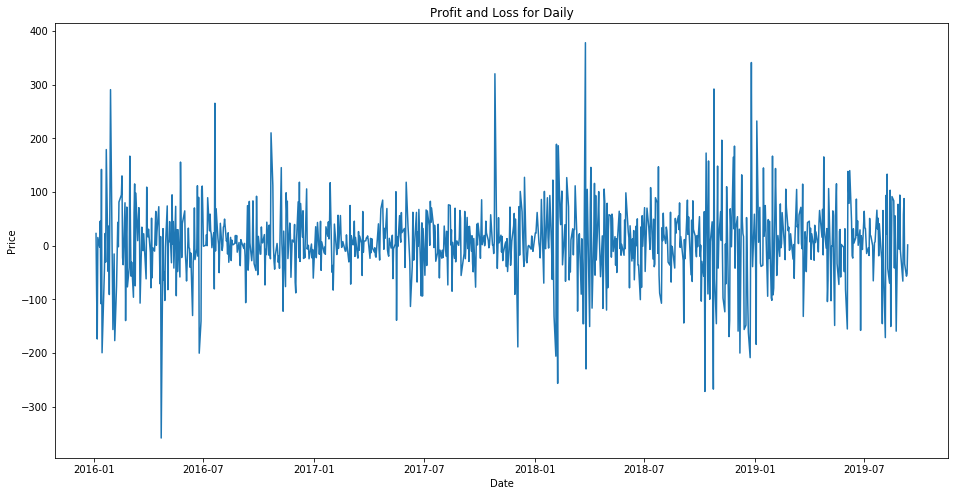

In [10]:
plt.figure(figsize=(16,8))
plt.plot(dataset['PnL'])
plt.title('Profit and Loss for Daily')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

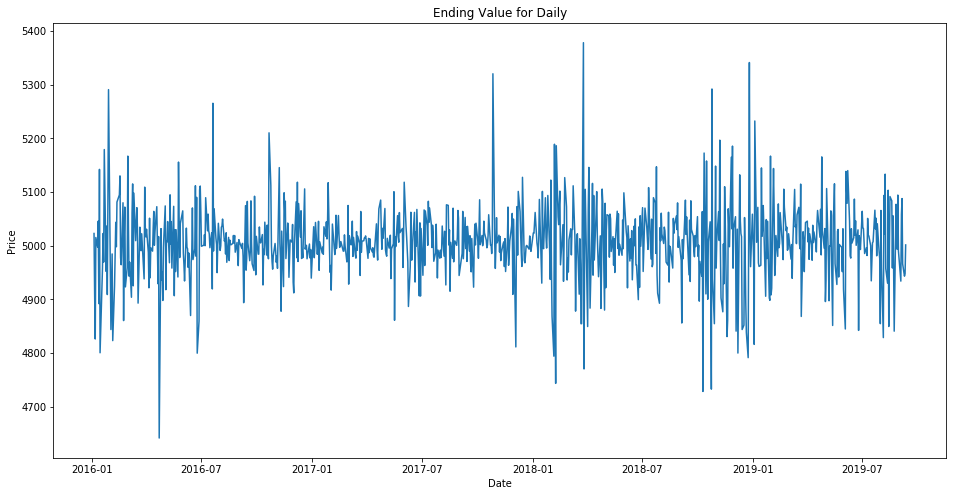

In [11]:
plt.figure(figsize=(16,8))
plt.plot(dataset['End'])
plt.title('Ending Value for Daily')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [12]:
# How many shares can get with the current money?
Shares = round(int(float(Start) / dataset['Adj Close'][0]),1)
Purchase_Price = dataset['Adj Close'][0] # Invest in the Beginning Price
Current_Value = dataset['Adj Close'][-1] # Value of stock of Ending Price
Purchase_Cost = Shares * Purchase_Price
Current_Value = Shares * Current_Value
Profit_or_Loss = Current_Value - Purchase_Cost 

In [13]:
print(symbol + ' profit or loss of $%.2f' % (Profit_or_Loss))

MSFT profit or loss of $8370.33


In [31]:
percentage_gain_or_loss = (Profit_or_Loss/Current_Value) * 100
print('%s %%' % round(percentage_gain_or_loss,2))

62.75 %


In [32]:
percentage_returns = (Current_Value - Purchase_Cost)/ Purchase_Cost 
print('%s %%' % round(percentage_returns,2))

1.68 %


In [37]:
net_gains_or_losses = (dataset['Adj Close'][-1] - dataset['Adj Close'][0]) / dataset['Adj Close'][0]
print('%s %%' % round(net_gains_or_losses,2))

1.68 %


In [39]:
total_return = ((Current_Value/Purchase_Cost)-1) * 100
print('%s %%' % round(total_return,2))

168.44 %


In [41]:
print("Financial Analysis")
print('-' * 50)
print(symbol + ' profit or loss of $%.2f' % (Profit_or_Loss))
print('Percentage gain or loss: %s %%' % round(percentage_gain_or_loss,2))
print('Percentage of returns: %s %%' % round(percentage_returns,2))
print('Net gains or losses: %s %%' % round(net_gains_or_losses,2))
print('Total Returns: %s %%' % round(total_return,2))

Financial Analysis
--------------------------------------------------
MSFT profit or loss of $8370.33
Percentage gain or loss: 62.75 %
Percentage of returns: 1.68 %
Net gains or losses: 1.68 %
Total Returns: 168.44 %
